In [84]:
import numpy as np, pandas as pd
import scipy.stats as stat
import sklearn as sk
import pandas_profiling
import matplotlib as mlt
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, r2_score

In [86]:
credit_info = pd.read_excel('Data set.xlsx')

In [87]:
credit_info.head(3)

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,...,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,...,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4.0,1,67,6,June,14,2,2,...,1,0,0,0,0,0,1,0,0,0


In [88]:
credit_info.columns 

Index(['custid', 'region', 'townsize', 'gender', 'age', 'agecat', 'birthmonth',
       'ed', 'edcat', 'jobcat',
       ...
       'owncd', 'ownpda', 'ownpc', 'ownipod', 'owngame', 'ownfax', 'news',
       'response_01', 'response_02', 'response_03'],
      dtype='object', length=130)

## Drop those log Variables which are available as both log and exponential of log

In [89]:
credit_info.drop(columns=['lninc','lncreddebt','lnothdebt','lnlongmon','lnlongten','lntollmon','lntollten','lnequipmon','lnequipten','lncardmon','lncardten','lnwiremon','lnwireten'],inplace=True)

### Profile Report

In [90]:
pandas_profiling.ProfileReport(credit_info)

Number of variables,117
Number of observations,5000
Total Missing (%),0.0%
Total size in memory,4.5 MiB
Average record size in memory,936.0 B
Numeric,55
Categorical,1
Boolean,49
Date,0
Text (Unique),1
Rejected,11


## Dropping Variables having high Correlation

In [91]:
credit_info.drop(columns=['addresscat','agecat','card2tenure','commutecat','edcat','equipmon','longten','spoused','spousedcat','tenure'],inplace=True)

## Removing Variables which are irrelevant towards credit card analysis

In [93]:
credit_info.drop(columns=['custid','townsize','birthmonth','union','employ','hourstv','address','carown','cartype','carbought','carbuy','commute','commutecar','commutemotorcycle','commutecarpool','commutebus','commuterail','commutepublic','commutebike','commutewalk','commutenonmotor','telecommute','reason','polview','polparty','polcontrib','vote','cardtenure','bfast','tollfree','equip','callcard','wireless','multline','voice','pager','internet','callid','callwait','forward','confer','ebill','owntv','ownvcr','owndvd','owncd','ownpda','ownpc','ownipod','owngame','ownfax','news','pets_birds', 'pets_reptiles','pets', 'pets_cats', 'pets_dogs', 'pets_small', 'pets_saltfish','pets_freshfish'],axis=1,inplace=True)

In [94]:
credit_info.columns

Index(['region', 'gender', 'age', 'ed', 'jobcat', 'empcat', 'retire', 'income',
       'inccat', 'debtinc', 'creddebt', 'othdebt', 'default', 'jobsat',
       'marital', 'reside', 'homeown', 'hometype', 'cars', 'carvalue',
       'carcatvalue', 'commutetime', 'card', 'cardtype', 'cardbenefit',
       'cardfee', 'cardtenurecat', 'card2', 'card2type', 'card2benefit',
       'card2fee', 'card2tenurecat', 'cardspent', 'card2spent', 'active',
       'churn', 'longmon', 'tollmon', 'tollten', 'equipten', 'cardmon',
       'cardten', 'wiremon', 'wireten', 'response_01', 'response_02',
       'response_03'],
      dtype='object')

## Preparing Dependent Variable

In [95]:
credit_info['TotalSpent'] = credit_info.cardspent + credit_info.card2spent
credit_info.drop(columns=['cardspent','card2spent'],axis=1,inplace=True)

In [96]:
credit_info.columns

Index(['region', 'gender', 'age', 'ed', 'jobcat', 'empcat', 'retire', 'income',
       'inccat', 'debtinc', 'creddebt', 'othdebt', 'default', 'jobsat',
       'marital', 'reside', 'homeown', 'hometype', 'cars', 'carvalue',
       'carcatvalue', 'commutetime', 'card', 'cardtype', 'cardbenefit',
       'cardfee', 'cardtenurecat', 'card2', 'card2type', 'card2benefit',
       'card2fee', 'card2tenurecat', 'active', 'churn', 'longmon', 'tollmon',
       'tollten', 'equipten', 'cardmon', 'cardten', 'wiremon', 'wireten',
       'response_01', 'response_02', 'response_03', 'TotalSpent'],
      dtype='object')

In [99]:
cat_var = ['region','jobcat','empcat','inccat','jobsat','hometype','cars','carcatvalue','card','cardtype','cardbenefit','card2','card2type','card2benefit','card2fee','card2tenurecat','gender', 'retire', 'default', 'response_01', 'response_02', 'response_03', 'cardfee', 'active', 'homeown']
num_var = [var for var in credit_info.columns if var not in cat_var]

In [100]:
credit_num = credit_info[num_var]
credit_cat = credit_info[cat_var]

In [101]:
credit_num.columns

Index(['age', 'ed', 'income', 'debtinc', 'creddebt', 'othdebt', 'marital',
       'reside', 'carvalue', 'commutetime', 'cardtenurecat', 'churn',
       'longmon', 'tollmon', 'tollten', 'equipten', 'cardmon', 'cardten',
       'wiremon', 'wireten', 'TotalSpent'],
      dtype='object')

In [102]:
credit_cat.columns

Index(['region', 'jobcat', 'empcat', 'inccat', 'jobsat', 'hometype', 'cars',
       'carcatvalue', 'card', 'cardtype', 'cardbenefit', 'card2', 'card2type',
       'card2benefit', 'card2fee', 'card2tenurecat', 'gender', 'retire',
       'default', 'response_01', 'response_02', 'response_03', 'cardfee',
       'active', 'homeown'],
      dtype='object')

## Analyze the Dependent Variables

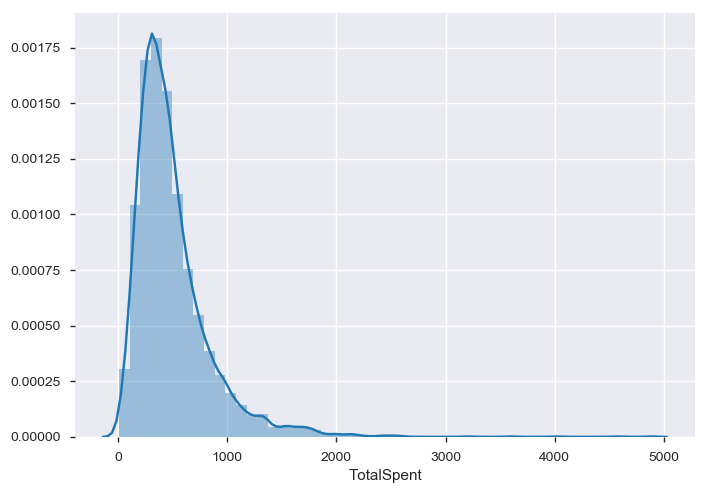

In [103]:
sns.distplot(credit_info.TotalSpent)

In [104]:
credit_num['ln_TotalSpent'] = np.log(credit_num.TotalSpent)

C:\Users\RAHUL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


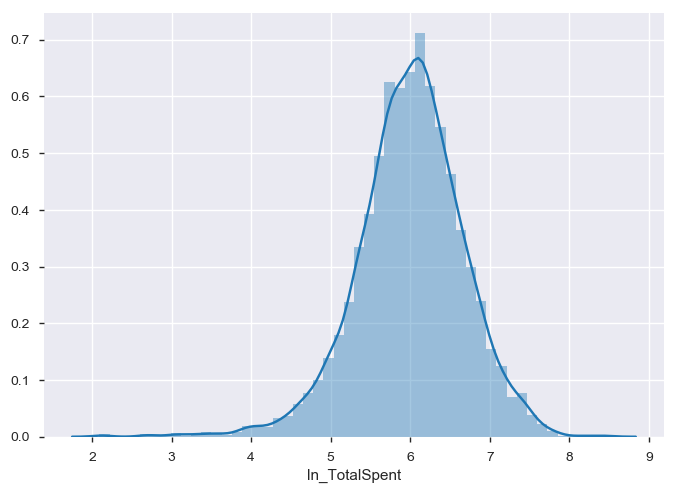

In [105]:
sns.distplot(credit_num.ln_TotalSpent)

## Data Audit - 1 (Uni Variate Analysis)

In [106]:
credit_num.describe(percentiles=[0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
age,5000.0,47.025600,17.770338,18.000000,18.000000,20.000000,23.000000,31.000000,47.000000,62.000000,72.000000,76.000000,79.000000,79.000000
ed,5000.0,14.543000,3.281083,6.000000,8.000000,9.000000,10.000000,12.000000,14.000000,17.000000,19.000000,20.000000,21.000000,23.000000
income,5000.0,54.759600,55.377511,9.000000,9.000000,13.000000,16.000000,24.000000,38.000000,67.000000,109.100000,147.000000,272.010000,1073.000000
debtinc,5000.0,9.954160,6.399783,0.000000,0.700000,1.900000,2.800000,5.100000,8.800000,13.600000,18.600000,22.200000,29.200000,43.100000
creddebt,5000.0,1.857326,3.415732,0.000000,0.033160,0.101088,0.175682,0.385520,0.926437,2.063820,4.299470,6.373010,14.280358,109.072596
othdebt,5000.0,3.654460,5.395172,0.000000,0.114299,0.287692,0.457997,0.980301,2.098540,4.314780,8.062046,11.815981,24.064260,141.459150
marital,5000.0,0.480200,0.499658,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
reside,5000.0,2.204000,1.393977,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,9.000000
carvalue,5000.0,23.232580,21.231637,-1.000000,-1.000000,-1.000000,2.490000,9.200000,17.000000,31.100000,52.910000,72.000000,92.001000,99.600000
commutetime,4998.0,25.345538,5.879149,8.000000,13.000000,16.000000,18.000000,21.000000,25.000000,29.000000,33.000000,35.000000,40.030000,48.000000


In [107]:
def outlier(x):
    x = x.clip(lower = x.dropna().quantile(0.05), upper = x.dropna().quantile(0.95))
    return x

In [108]:
credit_num = credit_num.apply(outlier)

### Missing Value Treatment

In [109]:
100 * (credit_num.isna().sum() / credit_num.shape[0])

age              0.00
ed               0.00
income           0.00
debtinc          0.00
creddebt         0.00
othdebt          0.00
marital          0.00
reside           0.00
carvalue         0.00
commutetime      0.04
cardtenurecat    0.00
churn            0.00
longmon          0.00
tollmon          0.00
tollten          0.00
equipten         0.00
cardmon          0.00
cardten          0.04
wiremon          0.00
wireten          0.00
TotalSpent       0.00
ln_TotalSpent    0.00
dtype: float64

In [110]:
def outlier(x):
    x = x.fillna(x.mean())
    return x

In [111]:
credit_num = credit_num.apply(outlier)

In [112]:
def cat_summary(x):
    return pd.Series([x.count(),x.isna().sum(),x.value_counts()],
                    index=['N','NMISS','VALUE'])

In [113]:
credit_cat.apply(cat_summary)

,region,jobcat,empcat,inccat,jobsat,hometype,cars,carcatvalue,card,cardtype,...,card2tenurecat,gender,retire,default,response_01,response_02,response_03,cardfee,active,homeown
N,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,...,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
NMISS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
VALUE,5 1027 1 1009 3 1003 2 995 4 ...,2 1640 1 1388 6 688 3 620 5 ...,2 1180 5 1135 1 1048 3 968 4 ...,2 1797 1 1330 3 839 4 650 5 ...,3 1085 2 1031 4 1016 1 975 5 ...,1 2265 2 1548 3 896 4 291 Name: ...,2 1607 1 1119 3 1082 0 497 4 ...,1 2399 2 1267 3 837 -1 497 Na...,4 1344 2 1247 3 1200 1 986 5 ...,4 1260 3 1257 1 1242 2 1241 Name: ...,...,5 1923 2 1019 3 933 4 760 1 ...,"1 2518 0 2482 Name: gender, dtype: int64","0 4262 1 738 Name: retire, dtype: int64","0 3829 1 1171 Name: default, dtype: int64","0 4582 1 418 Name: response_01, dtype: ...","0 4351 1 649 Name: response_02, dtype: ...","0 4487 1 513 Name: response_03, dtype: ...","0 4051 1 949 Name: cardfee, dtype: int64","0 2670 1 2330 Name: active, dtype: int64","1 3148 0 1852 Name: homeown, dtype: int64"


In [114]:
credit_cat.isna().sum()

region            0
jobcat            0
empcat            0
inccat            0
jobsat            0
hometype          0
cars              0
carcatvalue       0
card              0
cardtype          0
cardbenefit       0
card2             0
card2type         0
card2benefit      0
card2fee          0
card2tenurecat    0
gender            0
retire            0
default           0
response_01       0
response_02       0
response_03       0
cardfee           0
active            0
homeown           0
dtype: int64

### Create Dummy Variable

In [115]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [116]:
#for c_feature in categorical_features

for c_feature in cat_var:
    credit_cat[c_feature] = credit_cat[c_feature].astype('category')
    credit_cat = create_dummies(credit_cat , c_feature )
    
credit_cat.head(3)

C:\Users\RAHUL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,region_2,region_3,region_4,region_5,jobcat_2,jobcat_3,jobcat_4,jobcat_5,jobcat_6,empcat_2,...,card2tenurecat_5,gender_1,retire_1,default_1,response_01_1,response_02_1,response_03_1,cardfee_1,active_1,homeown_1
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
1,0,0,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
2,0,1,0,0,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1


In [117]:
credit_append = pd.concat([credit_num,credit_cat],axis=1)

## Data Audit - 2 (Bi-Variate Analysis)


In [118]:
y = credit_append.ln_TotalSpent
corr_dict = {}
i=[]
for var in credit_append.columns.difference(['TotalSpent','ln_TotalSpent']):
    if ((y.corr(credit_append[var]) > 0.1) | (y.corr(credit_append[var]) < -0.1)):
        corr_dict[var] = y.corr(credit_append[var])
        i.append(var)
corr_check = pd.DataFrame(corr_dict,index=i)
corr_check

,carcatvalue_1,carcatvalue_3,card_2,card_3,carvalue,creddebt,inccat_3,inccat_4,inccat_5,income,othdebt,retire_1
carcatvalue_1,-0.283425,0.26061,-0.120686,-0.111981,0.306301,0.247189,0.106582,0.177017,0.222367,0.372127,0.276769,-0.192124
carcatvalue_3,-0.283425,0.26061,-0.120686,-0.111981,0.306301,0.247189,0.106582,0.177017,0.222367,0.372127,0.276769,-0.192124
card_2,-0.283425,0.26061,-0.120686,-0.111981,0.306301,0.247189,0.106582,0.177017,0.222367,0.372127,0.276769,-0.192124
card_3,-0.283425,0.26061,-0.120686,-0.111981,0.306301,0.247189,0.106582,0.177017,0.222367,0.372127,0.276769,-0.192124
carvalue,-0.283425,0.26061,-0.120686,-0.111981,0.306301,0.247189,0.106582,0.177017,0.222367,0.372127,0.276769,-0.192124
creddebt,-0.283425,0.26061,-0.120686,-0.111981,0.306301,0.247189,0.106582,0.177017,0.222367,0.372127,0.276769,-0.192124
inccat_3,-0.283425,0.26061,-0.120686,-0.111981,0.306301,0.247189,0.106582,0.177017,0.222367,0.372127,0.276769,-0.192124
inccat_4,-0.283425,0.26061,-0.120686,-0.111981,0.306301,0.247189,0.106582,0.177017,0.222367,0.372127,0.276769,-0.192124
inccat_5,-0.283425,0.26061,-0.120686,-0.111981,0.306301,0.247189,0.106582,0.177017,0.222367,0.372127,0.276769,-0.192124
income,-0.283425,0.26061,-0.120686,-0.111981,0.306301,0.247189,0.106582,0.177017,0.222367,0.372127,0.276769,-0.192124


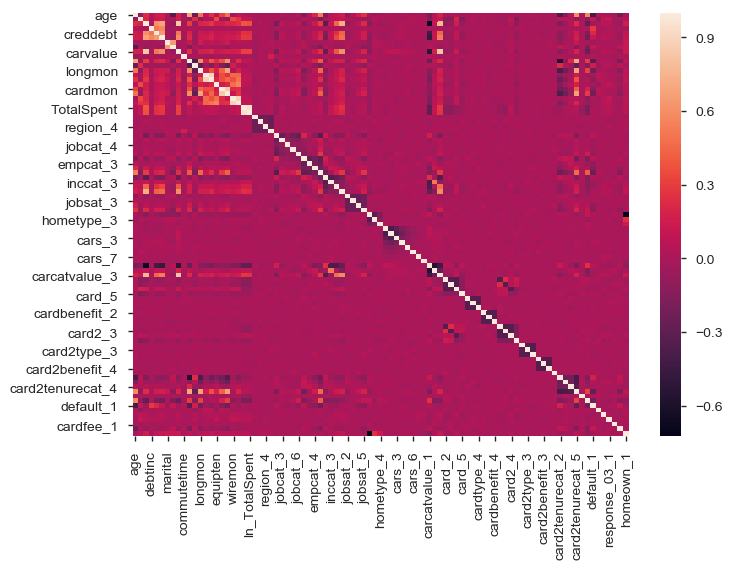

In [119]:
sns.heatmap(credit_append.corr())
plt.show()

In [120]:
def relation(x):
    y = credit_append.ln_TotalSpent
    c1 = y.corr(x)
    c2 = y.corr(np.sqrt(x))
    c3 = y.corr(np.log(x))
    c4 = y.corr(np.cbrt(x))
    res = pd.Series([c1,c2,c3,c4],index=['X','sqrt_X','ln_X','cbrt_X'])
    return res

In [121]:
corr_advanced = credit_append.apply(relation).T
corr_advanced.to_csv('Adv_Corr.csv')

C:\Users\RAHUL\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\Users\RAHUL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.
C:\Users\RAHUL\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


In [122]:
#Convert variable into Square Root, Cube Root, Log for Independent Variable

def sqrt(x):
    x = np.sqrt(x.dropna())
    return x

def cube_root(x):
    x = np.cbrt(x.dropna())
    return x

def log(x):
    x = np.log(x.dropna())
    return x

In [123]:
credit_append[['cubrt_creddebt','cubrt_cardmon']] = credit_append[['creddebt','cardmon']].apply(cube_root)
credit_append.drop(columns=['cardmon','creddebt'],inplace=True)

In [124]:
credit_append[['sqrt_othdebt','sqrt_cardten']] = credit_append[['othdebt','cardten']].apply(sqrt)
credit_append.drop(columns=['othdebt','cardten'],inplace=True)

In [125]:
credit_append[['log_age','log_income','log_reside','log_carvalue','log_cardtenurecat','log_longmon']] = credit_append[['age',	'income',	'reside',	'carvalue','cardtenurecat','longmon']].apply(log)
credit_append.drop(columns=['age',	'income',	'reside',	'carvalue','cardtenurecat','longmon'],inplace=True)

C:\Users\RAHUL\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':


In [128]:
credit_append.isna().sum()

ed                     0
debtinc                0
marital                0
commutetime            0
churn                  0
tollmon                0
tollten                0
equipten               0
wiremon                0
wireten                0
TotalSpent             0
ln_TotalSpent          0
region_2               0
region_3               0
region_4               0
region_5               0
jobcat_2               0
jobcat_3               0
jobcat_4               0
jobcat_5               0
jobcat_6               0
empcat_2               0
empcat_3               0
empcat_4               0
empcat_5               0
inccat_2               0
inccat_3               0
inccat_4               0
inccat_5               0
jobsat_2               0
                    ... 
card2type_2            0
card2type_3            0
card2type_4            0
card2benefit_2         0
card2benefit_3         0
card2benefit_4         0
card2fee_1             0
card2tenurecat_2       0
card2tenurecat_3       0


In [129]:
credit_append.drop(columns=['log_carvalue'],inplace=True)

## Feature Selection

### Find out the best features which can affect our model through
- RSE (Recursive Feature Elimination)
- K-Best
- F-Regression
- VIF  (Variation Inflation Factor)

###### Here We will be performing the Feature Selection through K-Best and RFE and will further check Multicollinearity through VIF

- RFE (Recursive Feature Elimination)

In [130]:
feature_columns = credit_append.columns.difference(['TotalSpent','ln_TotalSpent'])

In [131]:
credit_append.isna().any().sum()

0

In [132]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

X = credit_append[feature_columns]
Y = credit_append['ln_TotalSpent']

linreg = LinearRegression()
rfe = RFE(linreg,n_features_to_select=20)
rfe = rfe.fit(X,Y)
print(rfe.support_)
print(rfe.ranking_)

[False  True  True  True  True  True  True  True False False False False
 False False False False False False False  True  True  True  True False
 False False False False False False  True  True  True  True  True  True
  True  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False  True False
 False False False False False False False False False False False False
 False False False False]
[27  1  1  1  1  1  1  1 39 15 48 24 53 33 28 30 29 36 52  1  1  1  1 31
 44 55 58 42 50 56  1  1  1  1  1  1  1  1 32 63 35 34 37 20 38 17 16 14
  6 69  3 60 43 61 49 12 13 10 11 46 41  7  4  5 22 45 21 62  2 18  1 19
 54 59 25 57 23  9 40 47  8 51 68 26 64 65 66 67]


In [133]:
RFE_Features = credit_append[feature_columns].columns[rfe.get_support()]

In [135]:
RFE_Features

Index(['carcatvalue_1', 'carcatvalue_2', 'carcatvalue_3', 'card2_2', 'card2_3',
       'card2_4', 'card2_5', 'card_2', 'card_3', 'card_4', 'card_5', 'cars_1',
       'cars_2', 'cars_3', 'cars_4', 'cars_5', 'cars_6', 'cars_7', 'cars_8',
       'log_income'],
      dtype='object')

 - K Best

In [136]:
from sklearn.feature_selection import SelectKBest, f_regression

In [138]:
X = credit_append[feature_columns]

col = SelectKBest(f_regression,k=20).fit(X,credit_append['ln_TotalSpent'])
KBest = X.columns[col.get_support()]

KBest

Index(['carcatvalue_1', 'carcatvalue_2', 'carcatvalue_3', 'card2_3', 'card_2',
       'card_3', 'cubrt_creddebt', 'ed', 'gender_1', 'inccat_3', 'inccat_4',
       'inccat_5', 'jobcat_2', 'log_cardtenurecat', 'log_income', 'retire_1',
       'sqrt_othdebt', 'tollten', 'wiremon', 'wireten'],
      dtype='object')

#### Select Features from KBest and RFE

In [139]:
RFE_Features

Index(['carcatvalue_1', 'carcatvalue_2', 'carcatvalue_3', 'card2_2', 'card2_3',
       'card2_4', 'card2_5', 'card_2', 'card_3', 'card_4', 'card_5', 'cars_1',
       'cars_2', 'cars_3', 'cars_4', 'cars_5', 'cars_6', 'cars_7', 'cars_8',
       'log_income'],
      dtype='object')

In [140]:
KBest

Index(['carcatvalue_1', 'carcatvalue_2', 'carcatvalue_3', 'card2_3', 'card_2',
       'card_3', 'cubrt_creddebt', 'ed', 'gender_1', 'inccat_3', 'inccat_4',
       'inccat_5', 'jobcat_2', 'log_cardtenurecat', 'log_income', 'retire_1',
       'sqrt_othdebt', 'tollten', 'wiremon', 'wireten'],
      dtype='object')

In [141]:
final_list = ['card2_2', 'card2_3', 'card2_4', 'card2_5', 'card_2', 'card_3',
       'card_4', 'card_5', 'cars_1', 'cars_6', 'cars_7', 'cars_8',
       'cubrt_creddebt', 'edcat_4', 'edcat_5', 'gender_1', 'log_age',
       'log_income', 'response_03_1', 'spousedcat_5', 'agecat_5', 'agecat_6', 'carcatvalue_1', 'carcatvalue_2','carcatvalue_3', 'ed',
       'inccat_3', 'inccat_4', 'inccat_5', 'jobcat_2','retire_1', 'sqrt_othdebt', 'tollten', 'wiremon', 'wireten']

final_list = ['carcatvalue_1', 'carcatvalue_2', 'carcatvalue_3', 'card2_2', 'card2_3',
       'card2_4', 'card2_5', 'card_2', 'card_3', 'card_4', 'card_5', 'cars_1',
       'cars_2', 'cars_3', 'cars_4', 'cars_5', 'cars_6', 'cars_7', 'cars_8',
       'log_income', 'cubrt_creddebt', 'ed', 'gender_1', 'inccat_3', 'inccat_4',
       'inccat_5', 'jobcat_2', 'log_cardtenurecat', 'retire_1',
       'sqrt_othdebt', 'tollten', 'wiremon', 'wireten']

In [142]:
final_list

['carcatvalue_1',
 'carcatvalue_2',
 'carcatvalue_3',
 'card2_2',
 'card2_3',
 'card2_4',
 'card2_5',
 'card_2',
 'card_3',
 'card_4',
 'card_5',
 'cars_1',
 'cars_2',
 'cars_3',
 'cars_4',
 'cars_5',
 'cars_6',
 'cars_7',
 'cars_8',
 'log_income',
 'cubrt_creddebt',
 'ed',
 'gender_1',
 'inccat_3',
 'inccat_4',
 'inccat_5',
 'jobcat_2',
 'log_cardtenurecat',
 'retire_1',
 'sqrt_othdebt',
 'tollten',
 'wiremon',
 'wireten']

In [143]:
credit = credit_append[final_list]

In [144]:
credit = pd.concat([credit_append[final_list],credit_append[['TotalSpent','ln_TotalSpent']]],axis=1)

In [145]:
credit.columns

Index(['carcatvalue_1', 'carcatvalue_2', 'carcatvalue_3', 'card2_2', 'card2_3',
       'card2_4', 'card2_5', 'card_2', 'card_3', 'card_4', 'card_5', 'cars_1',
       'cars_2', 'cars_3', 'cars_4', 'cars_5', 'cars_6', 'cars_7', 'cars_8',
       'log_income', 'cubrt_creddebt', 'ed', 'gender_1', 'inccat_3',
       'inccat_4', 'inccat_5', 'jobcat_2', 'log_cardtenurecat', 'retire_1',
       'sqrt_othdebt', 'tollten', 'wiremon', 'wireten', 'TotalSpent',
       'ln_TotalSpent'],
      dtype='object')

## Model Build with Stat Technique

In [146]:
'+'.join(final_list)

'carcatvalue_1+carcatvalue_2+carcatvalue_3+card2_2+card2_3+card2_4+card2_5+card_2+card_3+card_4+card_5+cars_1+cars_2+cars_3+cars_4+cars_5+cars_6+cars_7+cars_8+log_income+cubrt_creddebt+ed+gender_1+inccat_3+inccat_4+inccat_5+jobcat_2+log_cardtenurecat+retire_1+sqrt_othdebt+tollten+wiremon+wireten'

In [416]:
#features = 'card2_2+card2_3+card2_4+card2_5+card_2+card_3+card_4+card_5+ed+log_age+log_income'
#features = 'card2_2+card2_3+card2_4+card2_5+card_2+card_3+card_4+card_5+log_income+ed+gender_1'
features = 'carcatvalue_2+card2_2+card2_3+card2_4+card2_5+card_2+card_3+card_4+card_5+log_income+ed+gender_1+inccat_4+retire_1'
feature_columns = features.split('+')

In [417]:
train, test = train_test_split( credit,test_size = 0.3,random_state = 1234 )

In [418]:
lm = smf.ols('ln_TotalSpent ~' + features,data=train).fit()

In [419]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:          ln_TotalSpent   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     126.6
Date:                Wed, 28 Aug 2019   Prob (F-statistic):          3.29e-298
Time:                        22:12:13   Log-Likelihood:                -2335.4
No. Observations:                3500   AIC:                             4701.
Df Residuals:                    3485   BIC:                             4793.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.6841      0.073     77.386

### Check MultiCollinearity between the Feature Columns

In [420]:

#MUltiple Iteration of Feature Columns based on the previous conversion and removing and checking the Multi Colinnearity Values
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices



a,b = dmatrices('ln_TotalSpent~' + features ,data=credit,return_type = 'dataframe')

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(b.values,i) for i in range(b.shape[1])]
vif['features'] = b.columns

In [421]:
vif.sort_values('features',ascending=False)
vif

,VIF Factor,features
0,84.610379,Intercept
1,1.105179,carcatvalue_2
2,2.076752,card2_2
3,2.159324,card2_3
4,2.271354,card2_4
5,1.447440,card2_5
6,1.948953,card_2
7,1.936855,card_3
8,2.159430,card_4
9,1.273257,card_5


## Model Build with ML Technique


In [422]:
import statsmodels.formula.api as smf

In [423]:
train_X, test_X, train_y, test_y = train_test_split( credit[feature_columns],
                                                  credit['ln_TotalSpent'],
                                                  test_size = 0.3,
                                                   random_state=7890)

In [424]:
linreg = LinearRegression()
linreg.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [425]:
linreg.score(train_X,train_y)

0.3342107437076256

In [426]:
linreg.score(test_X,test_y)

0.3077954807871295

## Cooks Theorem to remove Influential records in order to enhance the Score Further

In [427]:
m = smf.ols('ln_TotalSpent~' + features ,data=credit).fit()
infl = m.get_influence()
sm_fr = infl.summary_frame()
credit['cooks_distance'] = sm_fr.cooks_d

### Rebuild the Model to check the R2 Score

In [428]:
credit_Final = credit[credit.cooks_distance<(4/credit.shape[0])]

In [429]:
train_X, test_X, train_y, test_y = train_test_split( credit_Final[feature_columns],
                                                  credit_Final['ln_TotalSpent'],
                                                  test_size = 0.3,
                                                   random_state=7890)

In [430]:
linreg = LinearRegression()
linreg.fit( train_X, train_y )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [431]:
linreg.score(train_X,train_y)

0.4015624549365283

In [432]:
linreg.score(test_X,test_y)

0.35915879102975157

## Predicting Values and further checks

In [433]:
y_pred_t = linreg.predict(train_X)
y_pred_t

array([5.50173954, 5.79812927, 5.6366921 , ..., 6.27578227, 6.45162762,
       6.26357199])

In [434]:
y_pred_t = linreg.predict(train_X)
rmse_t = np.sqrt( metrics.mean_squared_error( train_y, y_pred_t) )
print(rmse_t)
print(metrics.r2_score( train_y, y_pred_t ))

0.429386884300282
0.4015624549365283


In [435]:
y_pred = linreg.predict( test_X )
rmse = np.sqrt( metrics.mean_squared_error( test_y, y_pred ) )
print(rmse)
print(metrics.r2_score( test_y, y_pred ))

0.4428157535079622
0.35915879102975157


In [436]:
resid = train_y - y_pred_t

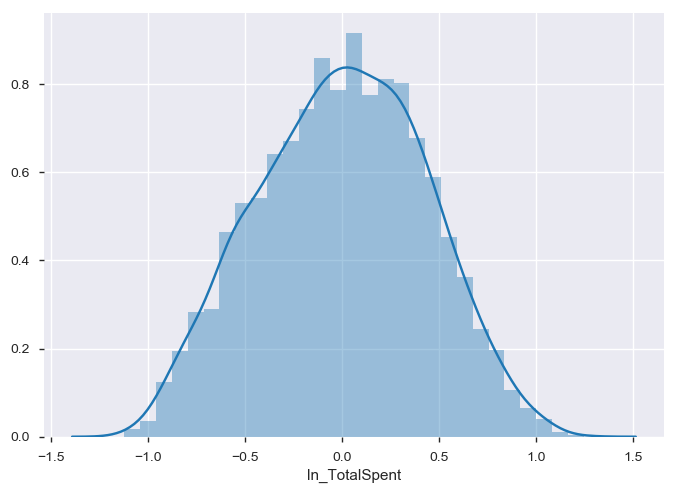

In [437]:
#Check1 - Residuals are Normally distributed 
sns.distplot(resid)

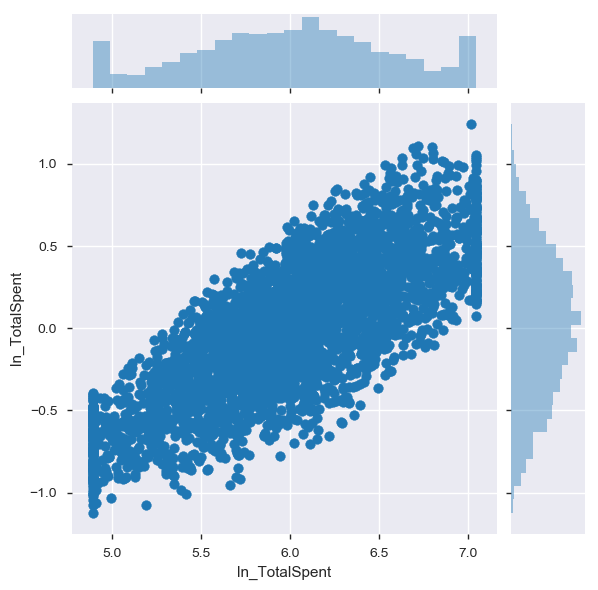

In [438]:
sns.jointplot(  train_y, resid )

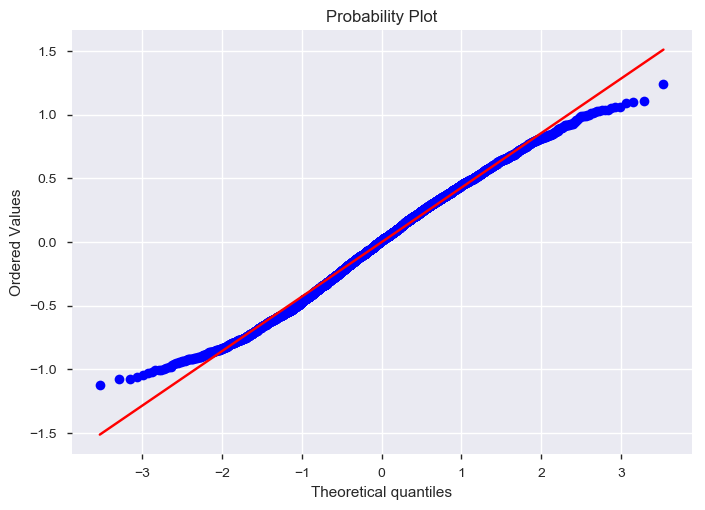

In [439]:
# To ensure residues are random i.e. normally distributed a Q-Q plot can be used
# Q-Q plot shows if the residuals are plotted along the line.
from scipy import stats
import pylab

#Check2 - Residuals are randomly distibuted
stats.probplot( resid, dist="norm", plot=pylab )
pylab.show()

In [440]:
### K-FOLD CROSS VALIDATION
from sklearn.model_selection import cross_val_score
linreg = LinearRegression()

In [441]:
cross_val_score( linreg, train_X, train_y, scoring = 'r2', cv = 10 )

array([0.37946136, 0.38599574, 0.44597914, 0.34659655, 0.44945303,
       0.36307486, 0.33329591, 0.40398052, 0.4094    , 0.39539126])

In [442]:
#Cross Validation Score for training data
round( np.mean( cross_val_score( linreg,
                              train_X,
                              train_y,
                              scoring = 'r2',
                              cv = 10 ) ), 2 )

0.39

In [443]:
#Cross Validation Score for test data
round( np.mean( cross_val_score( linreg,
                              test_X,
                              test_y,
                              scoring = 'r2',
                              cv = 10 ) ), 2 )

0.35

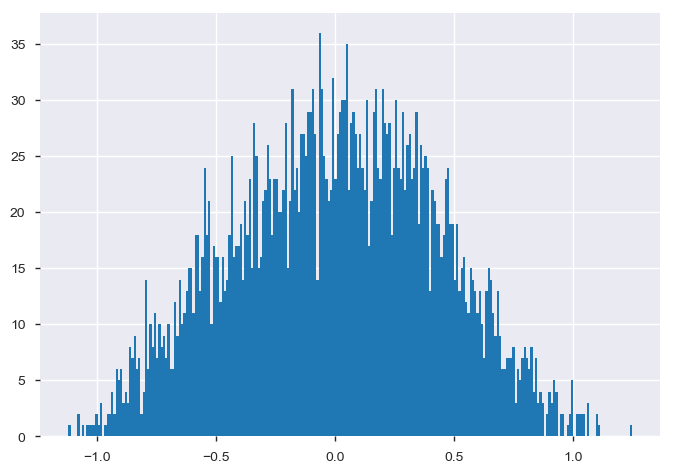

In [444]:
resid.hist(bins=250)

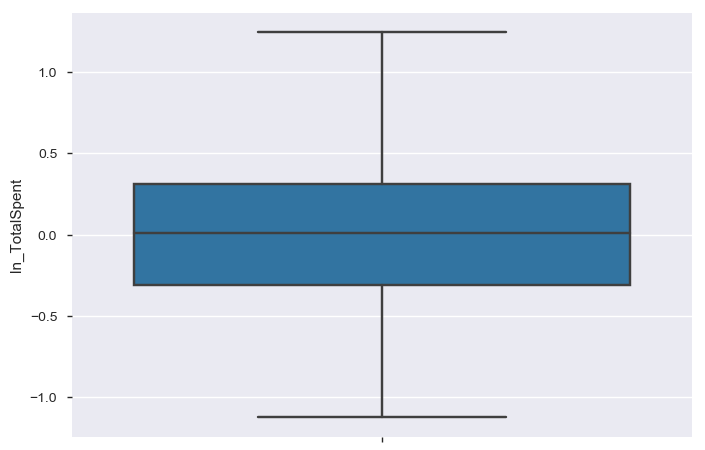

In [445]:
sns.boxplot(y= resid)

### Predict Credit Limit for New Applicants

In [446]:
print(np.exp(train_y.min()))
print(np.exp(train_y.max()))

133.10599885764105
1145.146488952038


In [447]:
print(np.exp(y_pred_t.min()))
print(np.exp(y_pred_t.max()))

194.24276258455458
1059.344942936655
